<a href="https://colab.research.google.com/github/BastienCherel/ExplainabilityAI/blob/main/Tutorial3/Tutorial3_CHEREL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHEREL Bastien

# Tutorial 3 : First level of explicabity: statistics

In this class we will use data from the same dataset we used in the previous TD. We will build upon the work done previously.
* We will be using python for the data analysis (R is accepted as well if needed)
* The main libraries we are going to use are pandas,SHAP, matplotlib and sklearn
* This TD will not be graded.





Question 1.
Create a new notebook and from TD2 load the variable selection and the different models that you
created

In [47]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

data =pd.concat([X.reset_index(drop=True), y], axis=1)

In [48]:
data.dropna(inplace=True)

In [49]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Convert from categorical to numeric data
from sklearn.preprocessing import OneHotEncoder


categorical_variables = heart_disease.variables[heart_disease.variables["type"] == "Categorical"].name
# Separate categorical and non-categorical data
categorical_data = data[categorical_variables]
non_categorical_data = data.drop(columns=categorical_variables)

enc = OneHotEncoder(sparse_output=False).fit(data)
encoded_data = enc.fit_transform(categorical_data)
# Convert encoded data to a DataFrame with appropriate column names
encoded_categorical_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

# Concatenate the encoded categorical data with the non-categorical data
data = pd.concat([non_categorical_data.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Display the first few rows
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_0,sex_1,cp_1,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67,160,286,108,1.5,3.0,2,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67,120,229,129,2.6,2.0,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0.0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [50]:
target = (data['num'] > 1).astype(int)
del(data['num'])
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67,160,286,108,1.5,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67,120,229,129,2.6,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'n_estimators': [100, 200, 300, 1000]
}

# GridSearch to find the best parameters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model with GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Test the performance with the tuned hyperparameters
y_pred_tuned = best_rf_model.predict(X_test)

rf_acc = accuracy_score(y_pred_tuned,y_test)
rf_F1 = f1_score(y_pred_tuned,y_test, average= "weighted")
rf_rec=recall_score(y_pred_tuned,y_test)


Best Parameters: {'bootstrap': True, 'n_estimators': 100}


Question 2.
Install the shap package (documentation here https://shap.readthedocs.io/en/latest/index.html)

In [52]:
%pip install shap
import shap


Question 3.
Let’s begin with an enrichment on the random forest interpretation.
* Get the variable importance of your features
* Recall the explanation you gave on them
* using the Treeexplainer function of the shap package, find the shapley values
* Visualise a couple of the explanations that are given with shap.forceplot. Can you explain them?
* Using the ”summary plot” with the ”plot type” equal to bar feature can you compare the importance
that shapley gives to the importance that the native ”variable importance” has given you?
* Do you understand the plot if you remove the plot type?


In [53]:
# Assuming best_rf_model is your trained Random Forest model and X_train is the training data
feature_importances = best_rf_model.feature_importances_
feature_importances

array([0.06952846, 0.06567666, 0.07855345, 0.11496215, 0.15468559,
       0.1061618 , 0.01167537, 0.01210673, 0.00650441, 0.00316296,
       0.01370427, 0.05864173, 0.00852556, 0.01173516, 0.01276218,
       0.        , 0.01247333, 0.02995021, 0.02509779, 0.03763056,
       0.02741185, 0.00835897, 0.07517127, 0.00958847, 0.04593105])

In [54]:
rf_explainer = shap.TreeExplainer(best_rf_model)

shap_values = rf_explainer.shap_values(X_train)
shap_values

array([[[ 9.75619619e-03, -9.75619619e-03],
        [ 3.04724475e-03, -3.04724475e-03],
        [ 2.86835741e-03, -2.86835741e-03],
        ...,
        [ 6.21219118e-02, -6.21219118e-02],
        [ 3.02219569e-03, -3.02219569e-03],
        [ 4.12254615e-02, -4.12254615e-02]],

       [[-2.25837772e-03,  2.25837772e-03],
        [-4.24986350e-02,  4.24986350e-02],
        [-3.99864384e-02,  3.99864384e-02],
        ...,
        [ 7.30999524e-03, -7.30999524e-03],
        [-1.82694259e-03,  1.82694259e-03],
        [ 1.24809820e-02, -1.24809820e-02]],

       [[-2.48815484e-02,  2.48815484e-02],
        [-2.54492685e-02,  2.54492685e-02],
        [-3.20216227e-02,  3.20216227e-02],
        ...,
        [-9.46176043e-02,  9.46176043e-02],
        [ 5.77666483e-04, -5.77666483e-04],
        [-6.06581565e-02,  6.06581565e-02]],

       ...,

       [[ 1.15956007e-02, -1.15956007e-02],
        [ 2.33666849e-03, -2.33666849e-03],
        [-1.75589491e-02,  1.75589491e-02],
        ...,
     

In [55]:
sample_indices = [0, 1, 2]  # Select a few samples for visualization
import matplotlib.pyplot as plt
shap.initjs()
shap.plots.force(rf_explainer.expected_value[0], shap_values=shap_values[:,0],
                   matplotlib=False, show=True)

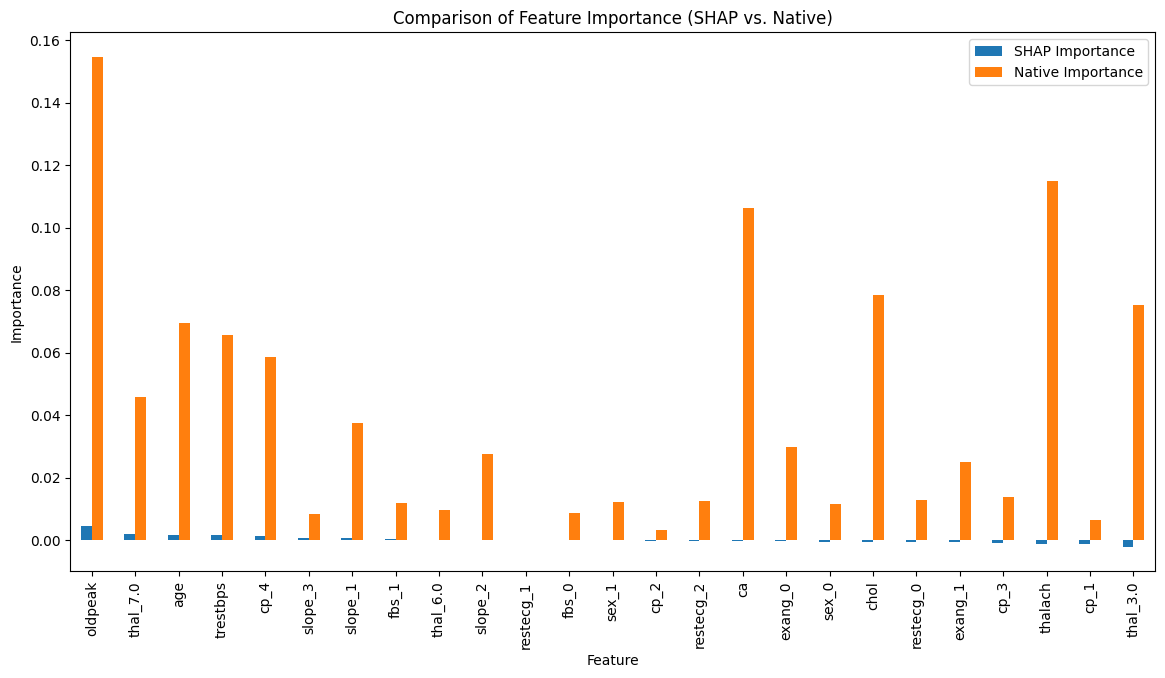

In [56]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Obtain native feature importance from the Random Forest model
native_importance = best_rf_model.feature_importances_

# Calculate mean SHAP values for the first class (index 0)
# The rf_shap_values array has shape (207, 25, 2),
# so we need to select the first class before calculating the mean.
mean_shap_values = shap_values[:,:,0].mean(axis=0)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance': mean_shap_values,  # Use the calculated mean SHAP values
    'Native Importance': native_importance
})

# Sort the DataFrame by SHAP Importance for better visualization
importance_df = importance_df.sort_values(by='SHAP Importance', ascending=False)

# Plot comparison of SHAP and Native importance
importance_df.set_index('Feature').plot(kind='bar', figsize=(14, 7))
plt.title("Comparison of Feature Importance (SHAP vs. Native)")
plt.ylabel('Importance')
plt.show()

In [57]:
print(shap_values.shape)
print(X_train.shape)

(207, 25, 2)
(207, 25)


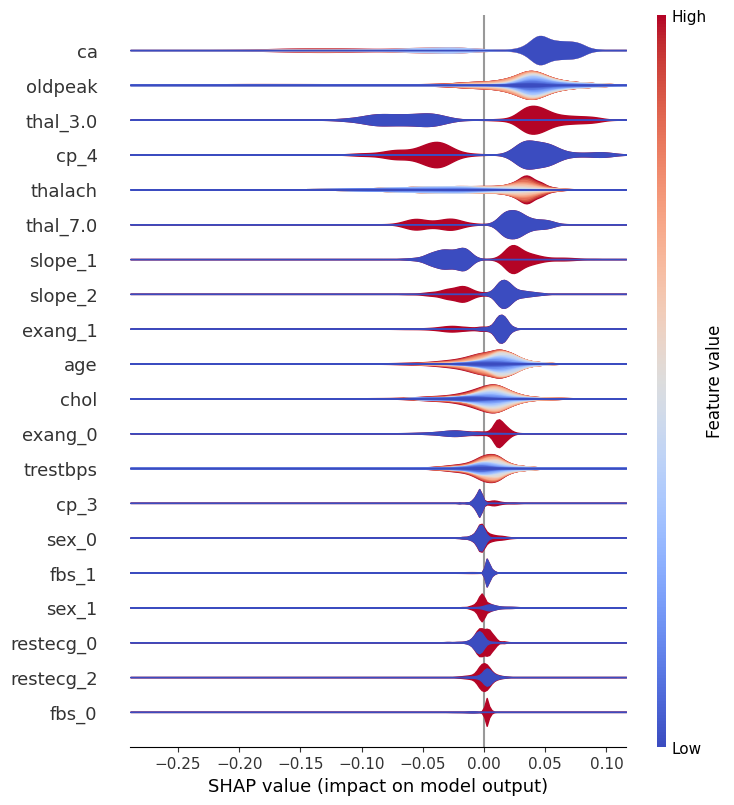

In [58]:
shap.plots.violin(shap_values[:,:,0], feature_names=data.columns,features=X_train, plot_type="layered_violin")


Question 4.
Now lets work on a different model. Let’s train an Xgboost
How does Xgboost work ? what is boosting? you can search the internet for these answers
* Install the Xgboost library if it’s not already installed
* Fit an Xgboost to your data and fine tune it
* Is it better than your Random Forest? why?


In [59]:
%pip install xgboost

In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost model
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5 , 6, 7],
    'min_child_weight': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_xgb_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


# Test the performance with the tuned hyperparameters
y_pred_xgb = best_rf_model.predict(X_test)

xgb_acc = accuracy_score(y_pred_xgb,y_test)
xgb_F1 = f1_score(y_pred_xgb,y_test, average= "weighted")
xgb_rec=recall_score(y_pred_xgb,y_test)

Best parameters found:  {'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}


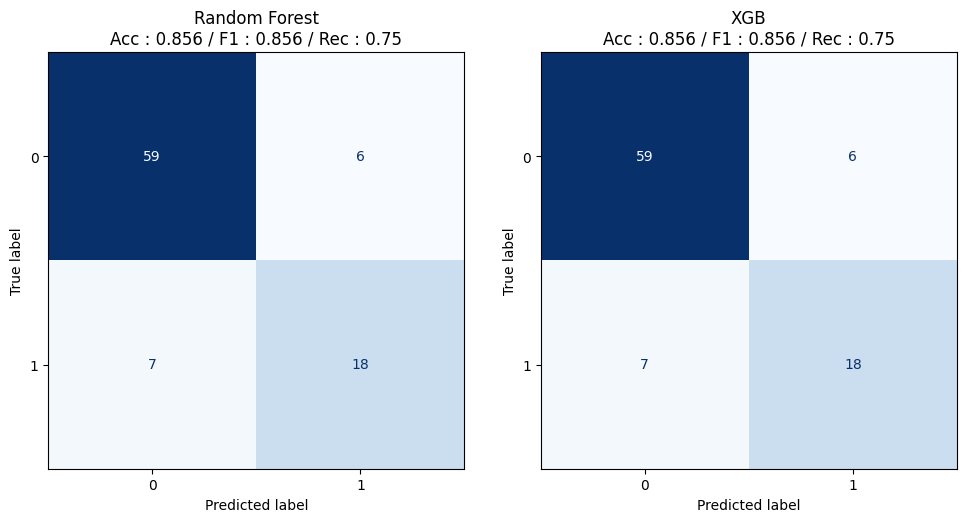

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Set up the side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figure size as needed

# Logistic Regression Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_tuned, labels=best_rf_model.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=best_rf_model.classes_)
rf_disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f"Random Forest\nAcc : {round(rf_acc,3)} / F1 : {round(rf_F1,3)} / Rec : {round(rf_rec,3)}")

# Decision Tree Confusion Matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb, labels=best_xgb_model.classes_)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=best_xgb_model.classes_)
xgb_disp.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title(f"XGB\nAcc : {round(xgb_acc, 3)} / F1 : {round(xgb_F1, 3)} / Rec : {round(xgb_rec, 3)}")


# Adjust layout and show plot
plt.tight_layout()
plt.show()


Question 5.
Let’s compare the feature importance of the Random Forest and the Xgboost
* Using shap’s tree explainer get the shapley values for this new model.
* Select the variables that are the most important and plot a dependency plot. Does the result confirm
your intuition?
* Compare the summary plot to the summary plot of the random forest. What are the changes?


In [62]:
xgb_explainer = shap.TreeExplainer(best_xgb_model)

xgb_shap_values = xgb_explainer.shap_values(X_train)
xgb_shap_values

array([[-0.14041725,  0.5130049 , -0.08828285, ..., -1.3319272 ,
         0.        ,  0.        ],
       [-0.41580787,  0.47318172,  0.30542436, ..., -0.88760364,
         0.        ,  0.        ],
       [ 0.33931726,  0.23599112,  0.44519132, ...,  0.8656598 ,
         0.        ,  0.        ],
       ...,
       [-0.42116243,  0.25507903,  0.40669242, ..., -1.139107  ,
         0.        ,  0.        ],
       [ 0.44753706,  0.02587917, -0.33553395, ..., -1.0648956 ,
         0.        ,  0.        ],
       [ 0.4553751 ,  0.06793351,  0.10780538, ...,  0.8477418 ,
         0.        ,  0.        ]], dtype=float32)

In [72]:
print(xgb_shap_values.shape)

(207, 25)


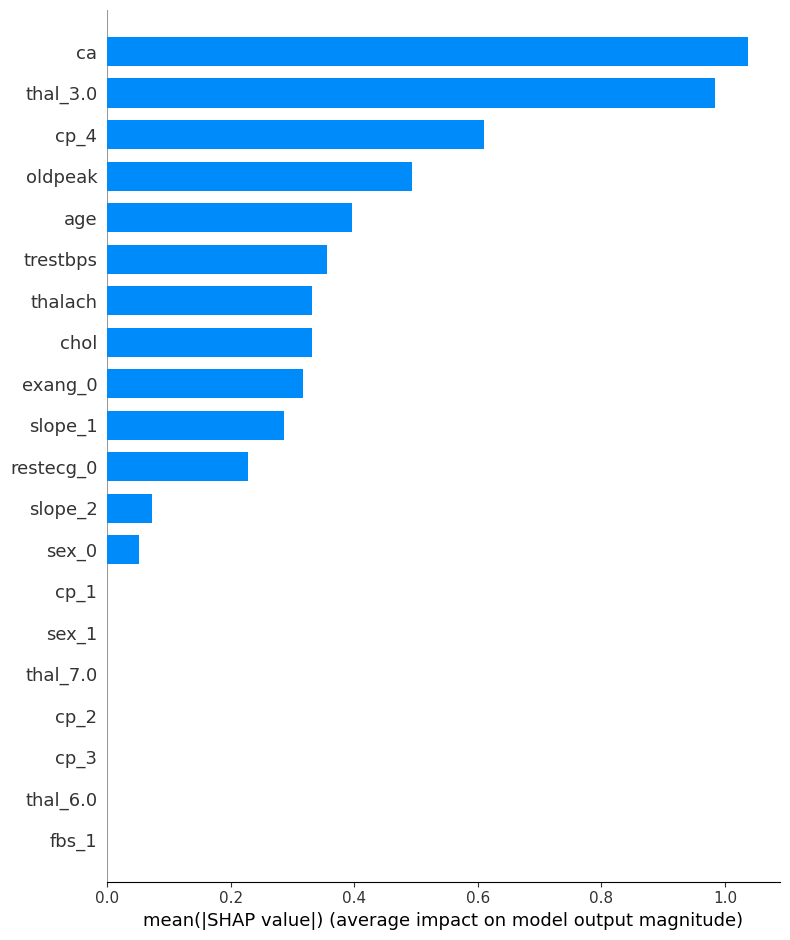

In [63]:
# Plot the summary plot for XGBoost
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar")

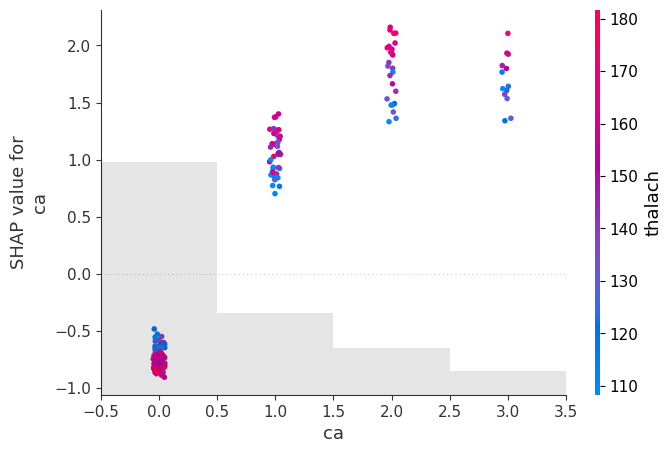

In [64]:
# Select a top variable from the summary plot
from shap import explainers
top_variable = "ca"
explainer = shap.Explainer(best_xgb_model, X_train)
explanation = explainer(X_train)
# Create a dependency plot for the selected feature
shap.plots.scatter(explanation[:, top_variable], color=explanation)

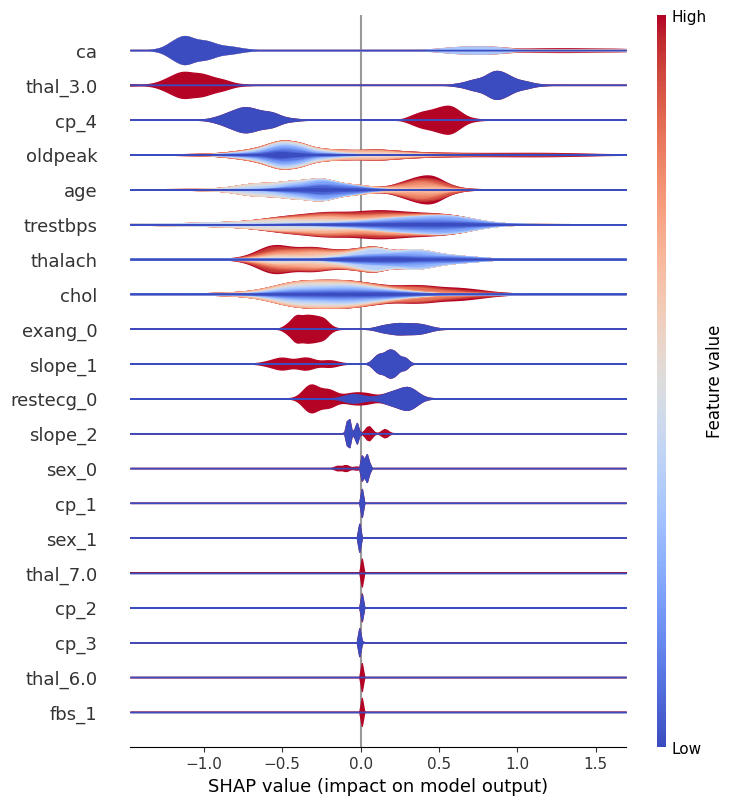

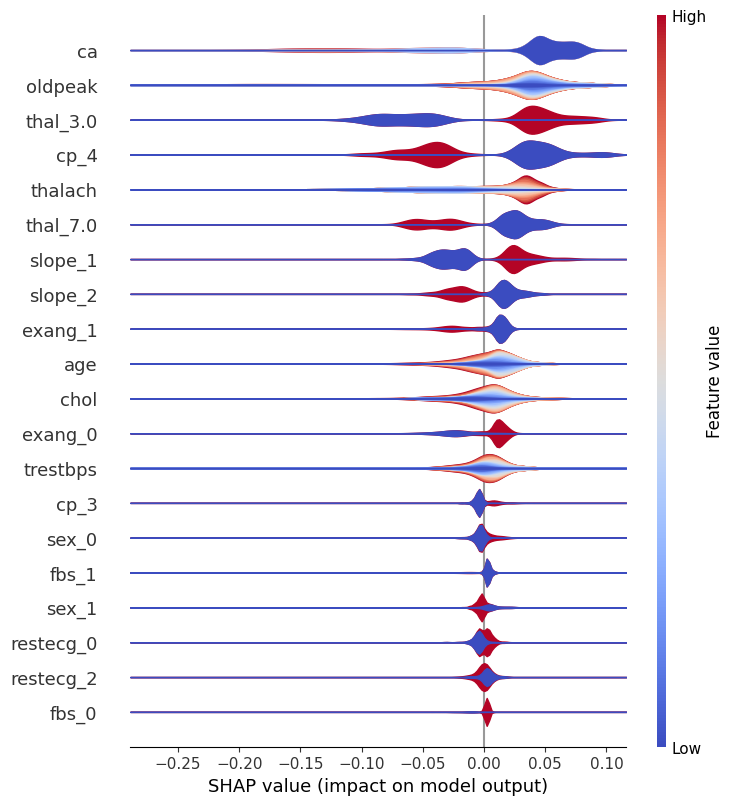

In [74]:
shap.plots.violin(xgb_shap_values, feature_names=data.columns,features=X_train, plot_type="layered_violin")
shap.plots.violin(shap_values[:,:,0], feature_names=data.columns,features=X_train, plot_type="layered_violin")





Question 6.
We can use shapley values from the Xgboost to learn more about the properties. Let’s cluster the
properties based on the shapley values.
* Let’s reduce the dimension of our data for visualisation purposes. Do a PCA with the shapley values
and visualise the 2 principal axis.
* Given the visualisation choose a clustering algorithm (K-Means, DBSCAN, gausian mixture...) and
try to cluster the shapley values of the property.
* Visualise your results
* What characteristics can you give to each cluster?
* What conclusion can you reach?

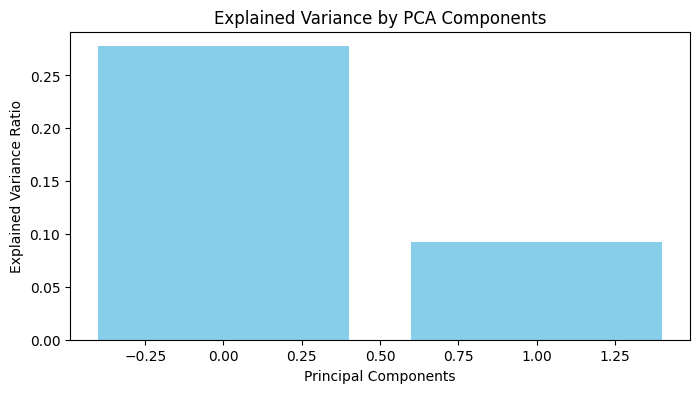

Silhouette Score for KMeans: 0.681


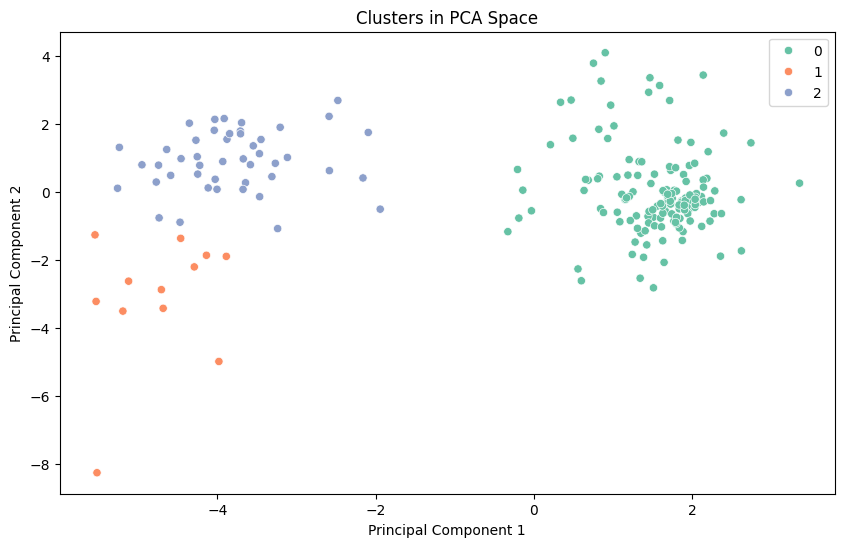

Cluster Characteristics (Mean SHAP Values per Feature):
              age  trestbps      chol   thalach   oldpeak        ca     sex_0  \
Cluster                                                                         
0        0.010252  0.008107  0.007850  0.019720  0.036264  0.030922  0.001637   
1       -0.031874 -0.025372 -0.029467 -0.043922 -0.000253 -0.121737 -0.004557   
2       -0.018080 -0.012921 -0.020138 -0.057761 -0.097019 -0.069925 -0.006375   

            sex_1      cp_1      cp_2  ...  restecg_1  restecg_2   exang_0  \
Cluster                                ...                                   
0        0.001825 -0.000146  0.000324  ...        0.0   0.001944  0.006679   
1       -0.004016 -0.004479 -0.003212  ...        0.0  -0.005599 -0.013689   
2       -0.005163 -0.003951 -0.001004  ...        0.0  -0.005865 -0.019937   

          exang_1   slope_1   slope_2   slope_3  thal_3.0  thal_6.0  thal_7.0  
Cluster                                                            

In [75]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Flatten SHAP values for PCA (assuming binary classification and focus on class 0)
shap_flattened = shap_values[:, :, 0]  # Shape: (n_samples, n_features)

# 2. Standardize SHAP values
scaler = StandardScaler()
shap_scaled = scaler.fit_transform(shap_flattened)

# 3. PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
shap_pca = pca.fit_transform(shap_scaled)

# Plot PCA explained variance ratio
plt.figure(figsize=(8, 4))
plt.bar(range(2), pca.explained_variance_ratio_[:2], color='skyblue')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

# 4. Apply clustering algorithm (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(shap_pca)

# Evaluate clustering
silhouette_avg = silhouette_score(shap_pca, cluster_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg:.3f}")

# 5. Visualize PCA with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=shap_pca[:, 0],
    y=shap_pca[:, 1],
    hue=cluster_labels,
    palette="Set2",
    legend="full"
)
plt.title("Clusters in PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 6. Characterize clusters by SHAP feature averages
import pandas as pd

shap_df = pd.DataFrame(shap_flattened, columns=data.columns)  # SHAP values dataframe
shap_df["Cluster"] = cluster_labels
cluster_summary = shap_df.groupby("Cluster").mean()

print("Cluster Characteristics (Mean SHAP Values per Feature):")
print(cluster_summary)